# Исследование уравнения Ван дер Поля
## Аль Мажариш Гасем Б01-205

---

### Приведение уравнения к виду системы ОДУ 1-го порядка:
Уравнение Ван дер Поля:

$\dfrac{d ^2 y}{dt^2} + a(y^2 - 1) \dfrac{dy}{dt} + y = 0$

$y(0) = y_0 > 0, ~~~~~ y'(0) = 0, ~~~~~ 0 <= t <= 30, ~~~~~ 1 <= a <= 1000$

Сначала преобразуем уравнение 2-го порядка в систему заменой $y_1 = y,~ y_2 = \dfrac{dy}{dt}$:

$
  \begin{cases}
    \dfrac{dy_1}{dt} = y_2  \\
    \dfrac{dy_2}{dt} = -a(y_1 ^2 - 1)y_2 - y_1
  \end{cases}
$

$
f(Y) = \begin{pmatrix}
       y_2 \\[0.3em]
       -a(y_1 ^ 2 - 1)y_2 -y_1       
     \end{pmatrix}
$

---

### Явный метод Рунге-Кутты 4-го порядка

$k_1 = f(Y_n),$

$k_2 = f(Y_n + \frac{h}{2}k_1),$

$k_3 = f(Y_n + \frac{h}{2}k_2),$

$k_4 = f(Y_n + hk_3),$

$Y_{n+1} = Y_n + \frac{h}{6}(k_1 + 2k_2 + 2k_3 + k_4)$

### Неявный метод Рунге-Кутты 4-го порядка: схема Гаусса

Обозначим:

$c_1 = \frac{1}{2} - \frac{\sqrt{3}}{6}, ~~~ c_2 = \frac{1}{2} + \frac{\sqrt{3}}{6}, ~~~ b_1 = b_2 = \frac{1}{2},$

$a_{11} = \frac{1}{4}, ~~~ a_{12} = \frac{1}{4} - \frac{\sqrt{3}}{6}, ~~~ a_{21} = \frac{1}{4} + \frac{\sqrt{3}}{6}, ~~~ a_{22} = \frac{1}{4}.$

Тогда:

$
  \begin{cases}
    k_1 = f(Y_n + h[a_{11} k_1 + a_{12} k_2])  \\
    k_2 = f(Y_n + h[a_{21} k_1 + a_{22} k_2])
  \end{cases}
$

$Y_{n+1} = Y_n + h \times (b_1 k_1 + b_2 k_2)$

Схема неявная, из-за чего система уравнений будет нелинейной. Решать будем методом Ньютона.

---

### Оценка жёсткости системы

Для упрощения анализа оценим спектр матрицы Якоби в точке y(0) и y'(0), это даст достаточную информацию о шаге.

$
J(Y) = \begin{pmatrix}
       0 & 1 \\[0.3em]
       -1 & -3a        
     \end{pmatrix}
$

Найдя собственные значения матрицы:

$s = \dfrac{|3a + \sqrt{9a^2 - 4}|}{|3a - \sqrt{9a^2 - 4}|}$


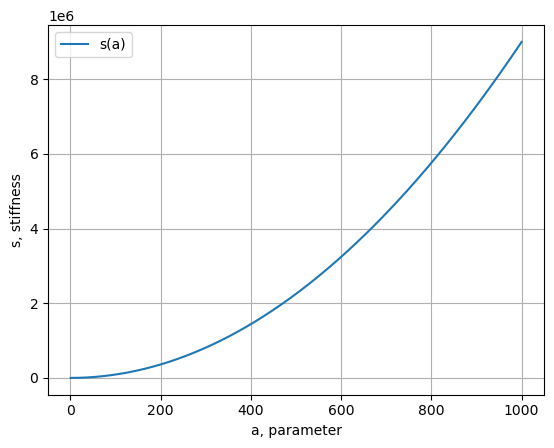

In [93]:
import numpy as np
import matplotlib.pyplot as plt

a = np.linspace(1, 1000, 1000)
s = abs(3 * a + np.sqrt(9 * a ** 2 - 4)) / abs(3 * a - np.sqrt(9 * a ** 2 - 4))

plt.plot(a, s, label="s(a)")
plt.xlabel("a, parameter")
plt.ylabel("s, stiffness")
plt.legend()
plt.grid()

Как видим, жёсткость системы растёт очень быстро, поэтому явный метод требует очень маленький шаг для сходимости, в то время как неявный является абсолютно устойчивым. При это неявный метод намного более ресурсоёмкий, т.к. приходится решать нелинейные уравнения. Оценим шаг сетки, при котором явный метод будет оставаться устойчивым. Функция устойчивости:

$R(z) = 1 + z + \frac{z^2}{2} + \frac{z^3}{6} + \frac{z^4}{24}, ~~~ где ~ z = h \lambda$

Условие устойчивости: $|R(z)| <= 1$

Отсюда имеем: $h |Re(\lambda)| < 2.785$

$\lambda = \dfrac{-3a \pm \sqrt{9a^2 - 4}}{2} ~~ => ~~ 6ah < 2.785$

$h < \dfrac{0.464}{a}$

In [95]:
# Параметры эксперимента
a = 15.0
y0 = 2.0
tmax = 30.0
h = 0.01

/tmp/ipykernel_11227/3506783580.py:8: RuntimeWarning: overflow encountered in scalar multiply
  -a*(y1**2 - 1)*y2 - y1])
/tmp/ipykernel_11227/3506783580.py:8: RuntimeWarning: overflow encountered in scalar power
  -a*(y1**2 - 1)*y2 - y1])
/tmp/ipykernel_11227/3506783580.py:16: RuntimeWarning: invalid value encountered in add
  return Yn + (h/6.0)*(k1 + 2*k2 + 2*k3 + k4)


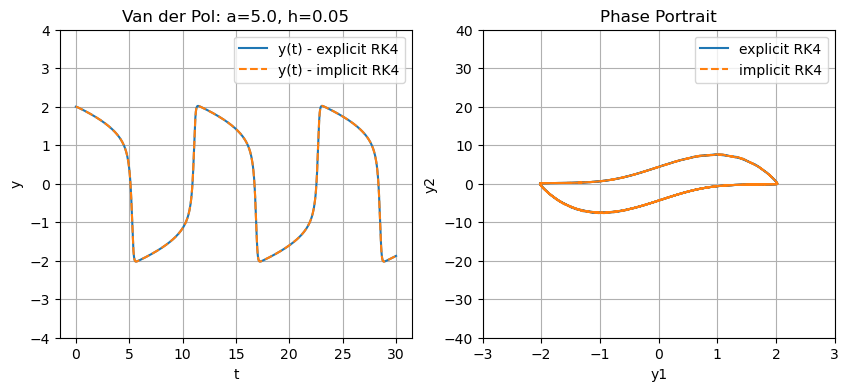

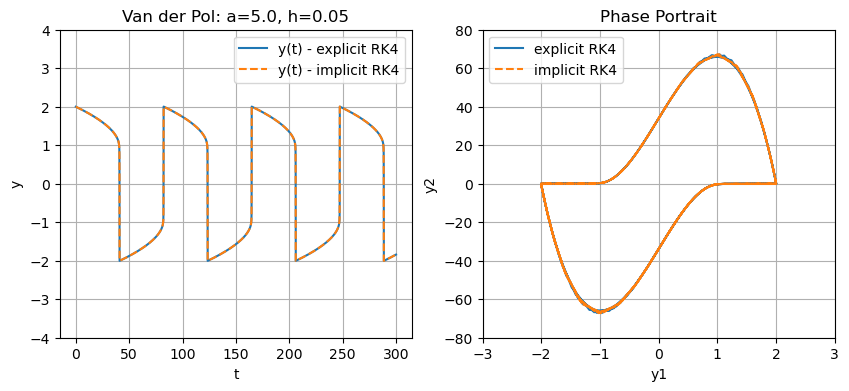

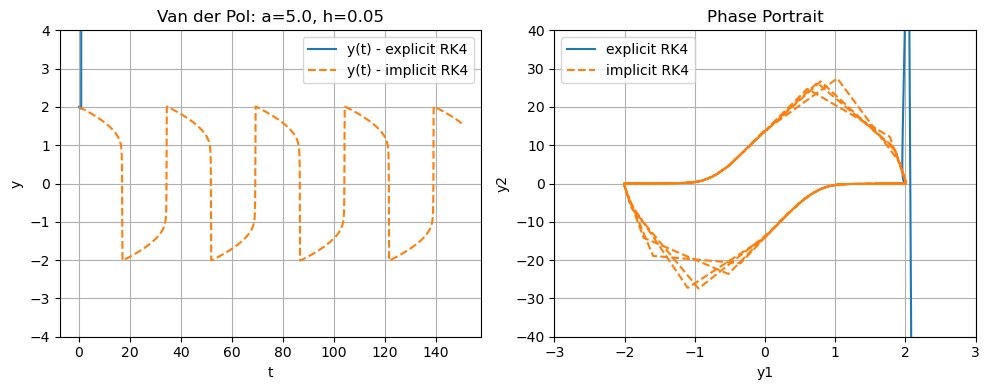

In [101]:
import numpy as np
import matplotlib.pyplot as plt

def f(Y, a):
    # Y = [y1, y2]
    y1, y2 = Y
    return np.array([y2,
                     -a*(y1**2 - 1)*y2 - y1])

# Явный метод РК4
def rk4_explicit_step(Yn, h, a):
    k1 = f(Yn, a)
    k2 = f(Yn + 0.5*h*k1, a)
    k3 = f(Yn + 0.5*h*k2, a)
    k4 = f(Yn + h*k3, a)
    return Yn + (h/6.0)*(k1 + 2*k2 + 2*k3 + k4)

# Неявный метод РК4
c1 = 0.5 - np.sqrt(3)/6
c2 = 0.5 + np.sqrt(3)/6
a11 = 0.25
a12 = 0.25 - np.sqrt(3)/6
a21 = 0.25 + np.sqrt(3)/6
a22 = 0.25
b1 = 0.5
b2 = 0.5

def rk4_implicit_step(Yn, h, a):
    """
    На каждом шаге решаем неявную систему:
        k1 = f(Yn + h*(a11*k1 + a12*k2))
        k2 = f(Yn + h*(a21*k1 + a22*k2))
    методом Ньютона.
    """
    # Начальное приближение для k1, k2 — возьмём явные оценки
    k1_guess = f(Yn, a)
    k2_guess = f(Yn, a)
    
    def G(k1k2):
        # k1k2 = [k1_1, k1_2, k2_1, k2_2]
        k1_vec = k1k2[0:2]
        k2_vec = k1k2[2:4]
        # Формируем вектор невязки
        G1 = k1_vec - f(Yn + h*(a11*k1_vec + a12*k2_vec), a)
        G2 = k2_vec - f(Yn + h*(a21*k1_vec + a22*k2_vec), a)
        return np.concatenate((G1, G2))
    
    def jacobian_G(k1k2):
        # Численно вычислим якобиан G (4x4) методом конечных разностей
        eps = 1e-8
        J = np.zeros((4,4))
        base = G(k1k2)
        for i in range(4):
            pert = np.zeros(4)
            pert[i] = eps
            val = G(k1k2 + pert)
            J[:,i] = (val - base)/eps
        return J

    # Метод Ньютона
    x = np.concatenate((k1_guess, k2_guess))
    for _ in range(20):
        r = G(x)
        if np.linalg.norm(r) < 1e-10:
            break
        J = jacobian_G(x)
        dx = np.linalg.solve(J, -r)
        x = x + dx
    
    k1_vec = x[0:2]
    k2_vec = x[2:4]

    Yn1 = Yn + h*(b1*k1_vec + b2*k2_vec)
    return Yn1

# Запуск сравнения решений
def solve_vdp(a=1.0, y0=1.0, tmax=20.0, h=0.01, method='explicit'):
    """
    Решаем систему Ван дер Поля от t=0 до t=tmax с шагом h,
    начальные условия: y1(0)=y0, y2(0)=0.
    method: 'explicit' или 'implicit'.
    """
    steps = int(np.floor((tmax)/h))
    t_values = np.zeros(steps+1)
    Y_values = np.zeros((steps+1, 2))
    
    # Начальные условия
    Y_values[0] = np.array([y0, 0.0])
    
    for n in range(steps):
        if method == 'explicit':
            Y_values[n+1] = rk4_explicit_step(Y_values[n], h, a)
        elif method == 'implicit':
            Y_values[n+1] = rk4_implicit_step(Y_values[n], h, a)
        t_values[n+1] = t_values[n] + h
    
    return t_values, Y_values

t_exp, Y_exp = solve_vdp(a=a, y0=y0, tmax=tmax, h=h, method='explicit')
t_imp, Y_imp = solve_vdp(a=a, y0=y0, tmax=tmax, h=h, method='implicit')

# Визуализация 1
plt.figure(figsize=(10,4))

# График y(t)
plt.subplot(1,2,1)
plt.plot(t_exp, Y_exp[:,0], label='y(t) - explicit RK4')
plt.plot(t_imp, Y_imp[:,0], '--', label='y(t) - implicit RK4')
plt.xlabel('t')
plt.ylabel('y')
plt.title(f'Van der Pol: a={a}, h={h}')
plt.legend()
plt.ylim((-4, 4))
plt.grid()

# Фазовый портрет
plt.subplot(1,2,2)
plt.plot(Y_exp[:,0], Y_exp[:,1], label='explicit RK4')
plt.plot(Y_imp[:,0], Y_imp[:,1], '--', label='implicit RK4')
plt.xlabel('y1')
plt.ylabel('y2')
plt.title('Phase Portrait')
plt.legend()
plt.ylim((-40, 40))
plt.xlim((-3, 3))
plt.grid()

t_exp, Y_exp = solve_vdp(a=50, y0=y0, tmax=10 * tmax, h=0.005, method='explicit')
t_imp, Y_imp = solve_vdp(a=50, y0=y0, tmax=10 * tmax, h=0.005, method='implicit')

# Визуализация 2
plt.figure(figsize=(10,4))

# График y(t)
plt.subplot(1,2,1)
plt.plot(t_exp, Y_exp[:,0], label='y(t) - explicit RK4')
plt.plot(t_imp, Y_imp[:,0], '--', label='y(t) - implicit RK4')
plt.xlabel('t')
plt.ylabel('y')
plt.title(f'Van der Pol: a={a}, h={h}')
plt.legend()
plt.ylim((-4, 4))
plt.grid()

# Фазовый портрет
plt.subplot(1,2,2)
plt.plot(Y_exp[:,0], Y_exp[:,1], label='explicit RK4')
plt.plot(Y_imp[:,0], Y_imp[:,1], '--', label='implicit RK4')
plt.xlabel('y1')
plt.ylabel('y2')
plt.title('Phase Portrait')
plt.legend()
plt.ylim((-80, 80))
plt.xlim((-3, 3))
plt.grid()

t_exp, Y_exp = solve_vdp(a=20, y0=y0, tmax=5 * tmax, h=0.05, method='explicit')
t_imp, Y_imp = solve_vdp(a=20, y0=y0, tmax=5 * tmax, h=0.05, method='implicit')

# Визуализация 3
plt.figure(figsize=(10,4))

# График y(t)
plt.subplot(1,2,1)
plt.plot(t_exp, Y_exp[:,0], label='y(t) - explicit RK4')
plt.plot(t_imp, Y_imp[:,0], '--', label='y(t) - implicit RK4')
plt.xlabel('t')
plt.ylabel('y')
plt.title(f'Van der Pol: a={a}, h={h}')
plt.legend()
plt.ylim((-4, 4))
plt.grid()

# Фазовый портрет
plt.subplot(1,2,2)
plt.plot(Y_exp[:,0], Y_exp[:,1], label='explicit RK4')
plt.plot(Y_imp[:,0], Y_imp[:,1], '--', label='implicit RK4')
plt.xlabel('y1')
plt.ylabel('y2')
plt.title('Phase Portrait')
plt.legend()
plt.ylim((-40, 40))
plt.xlim((-3, 3))
plt.grid()

plt.tight_layout()
plt.show()
